In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_filtered=pd.read_csv("D:\\1990-2023.csv")

In [3]:
df_filtered.describe()

,UV Radiation,Surface Temperature Max,Surface Temperature min,Surface Temperature mean,Temperature 2 m elevation corrected °C max,Temperature 2 m elevation corrected °C min,Temperature 2 m elevation corrected °C mean,Growing Degree Days 2 m elevation corrected GDDc sum,Precipitation Total sfc mm sum,Relative Humidity 2 m % max,...,Wind Speed 10 m km/h min,Wind Speed 10 m km/h mean,Wind Direction Dominant 10 m °,Wind Speed 80 m km/h max,Wind Speed 80 m km/h min,Wind Speed 80 m km/h mean,Wind Direction Dominant 80 m °,Wind Gust sfc km/h max,Wind Gust sfc km/h min,Wind Gust sfc km/h mean
count,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,...,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000
mean,565.657677,31.914123,22.905517,26.452521,30.862499,23.948604,27.124649,16.741636,1.923224,91.279353,...,2.421823,5.660083,234.064610,12.440074,3.111513,7.239725,246.152785,17.463304,5.606294,11.000339
std,147.958209,3.056504,1.444596,1.672819,2.902847,1.157872,1.447473,1.083206,6.035357,5.288807,...,2.081302,2.351932,83.634782,3.040546,2.520658,2.459091,61.456317,6.262531,4.481236,4.996232
min,66.419990,23.420000,16.070000,21.934168,24.136082,17.116083,22.988167,12.988165,0.000000,60.000000,...,0.000000,1.010093,0.000000,2.595997,0.000000,1.126993,0.000000,4.320000,0.000000,2.700000
25%,472.110000,29.960000,22.150000,25.243751,28.456083,23.306082,25.987333,15.963312,0.000000,89.000000,...,0.720000,3.538083,240.605160,10.245780,0.804984,5.246901,247.075290,12.599999,2.160000,7.139999
50%,597.480030,31.630000,22.960000,26.087708,31.106083,24.006083,27.124624,16.871392,0.000000,92.000000,...,1.835647,5.516806,266.961820,12.303366,2.520000,7.074716,269.019925,16.560000,3.960000,9.750000
75%,675.597505,34.230000,23.730000,27.610417,33.206085,24.666082,28.250871,17.597164,0.800000,95.000000,...,3.960000,7.506221,280.445015,14.489720,5.040000,9.016720,279.700627,21.240000,8.280000,13.995000
max,850.750060,44.200000,28.110000,31.832497,37.876083,27.656082,31.264418,19.203709,126.800000,100.000000,...,10.787993,14.569714,360.000000,26.882141,14.759999,17.925684,360.000000,50.760000,31.680000,40.424995


In [4]:
# Select only numerical columns
numerical_columns = df_filtered.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

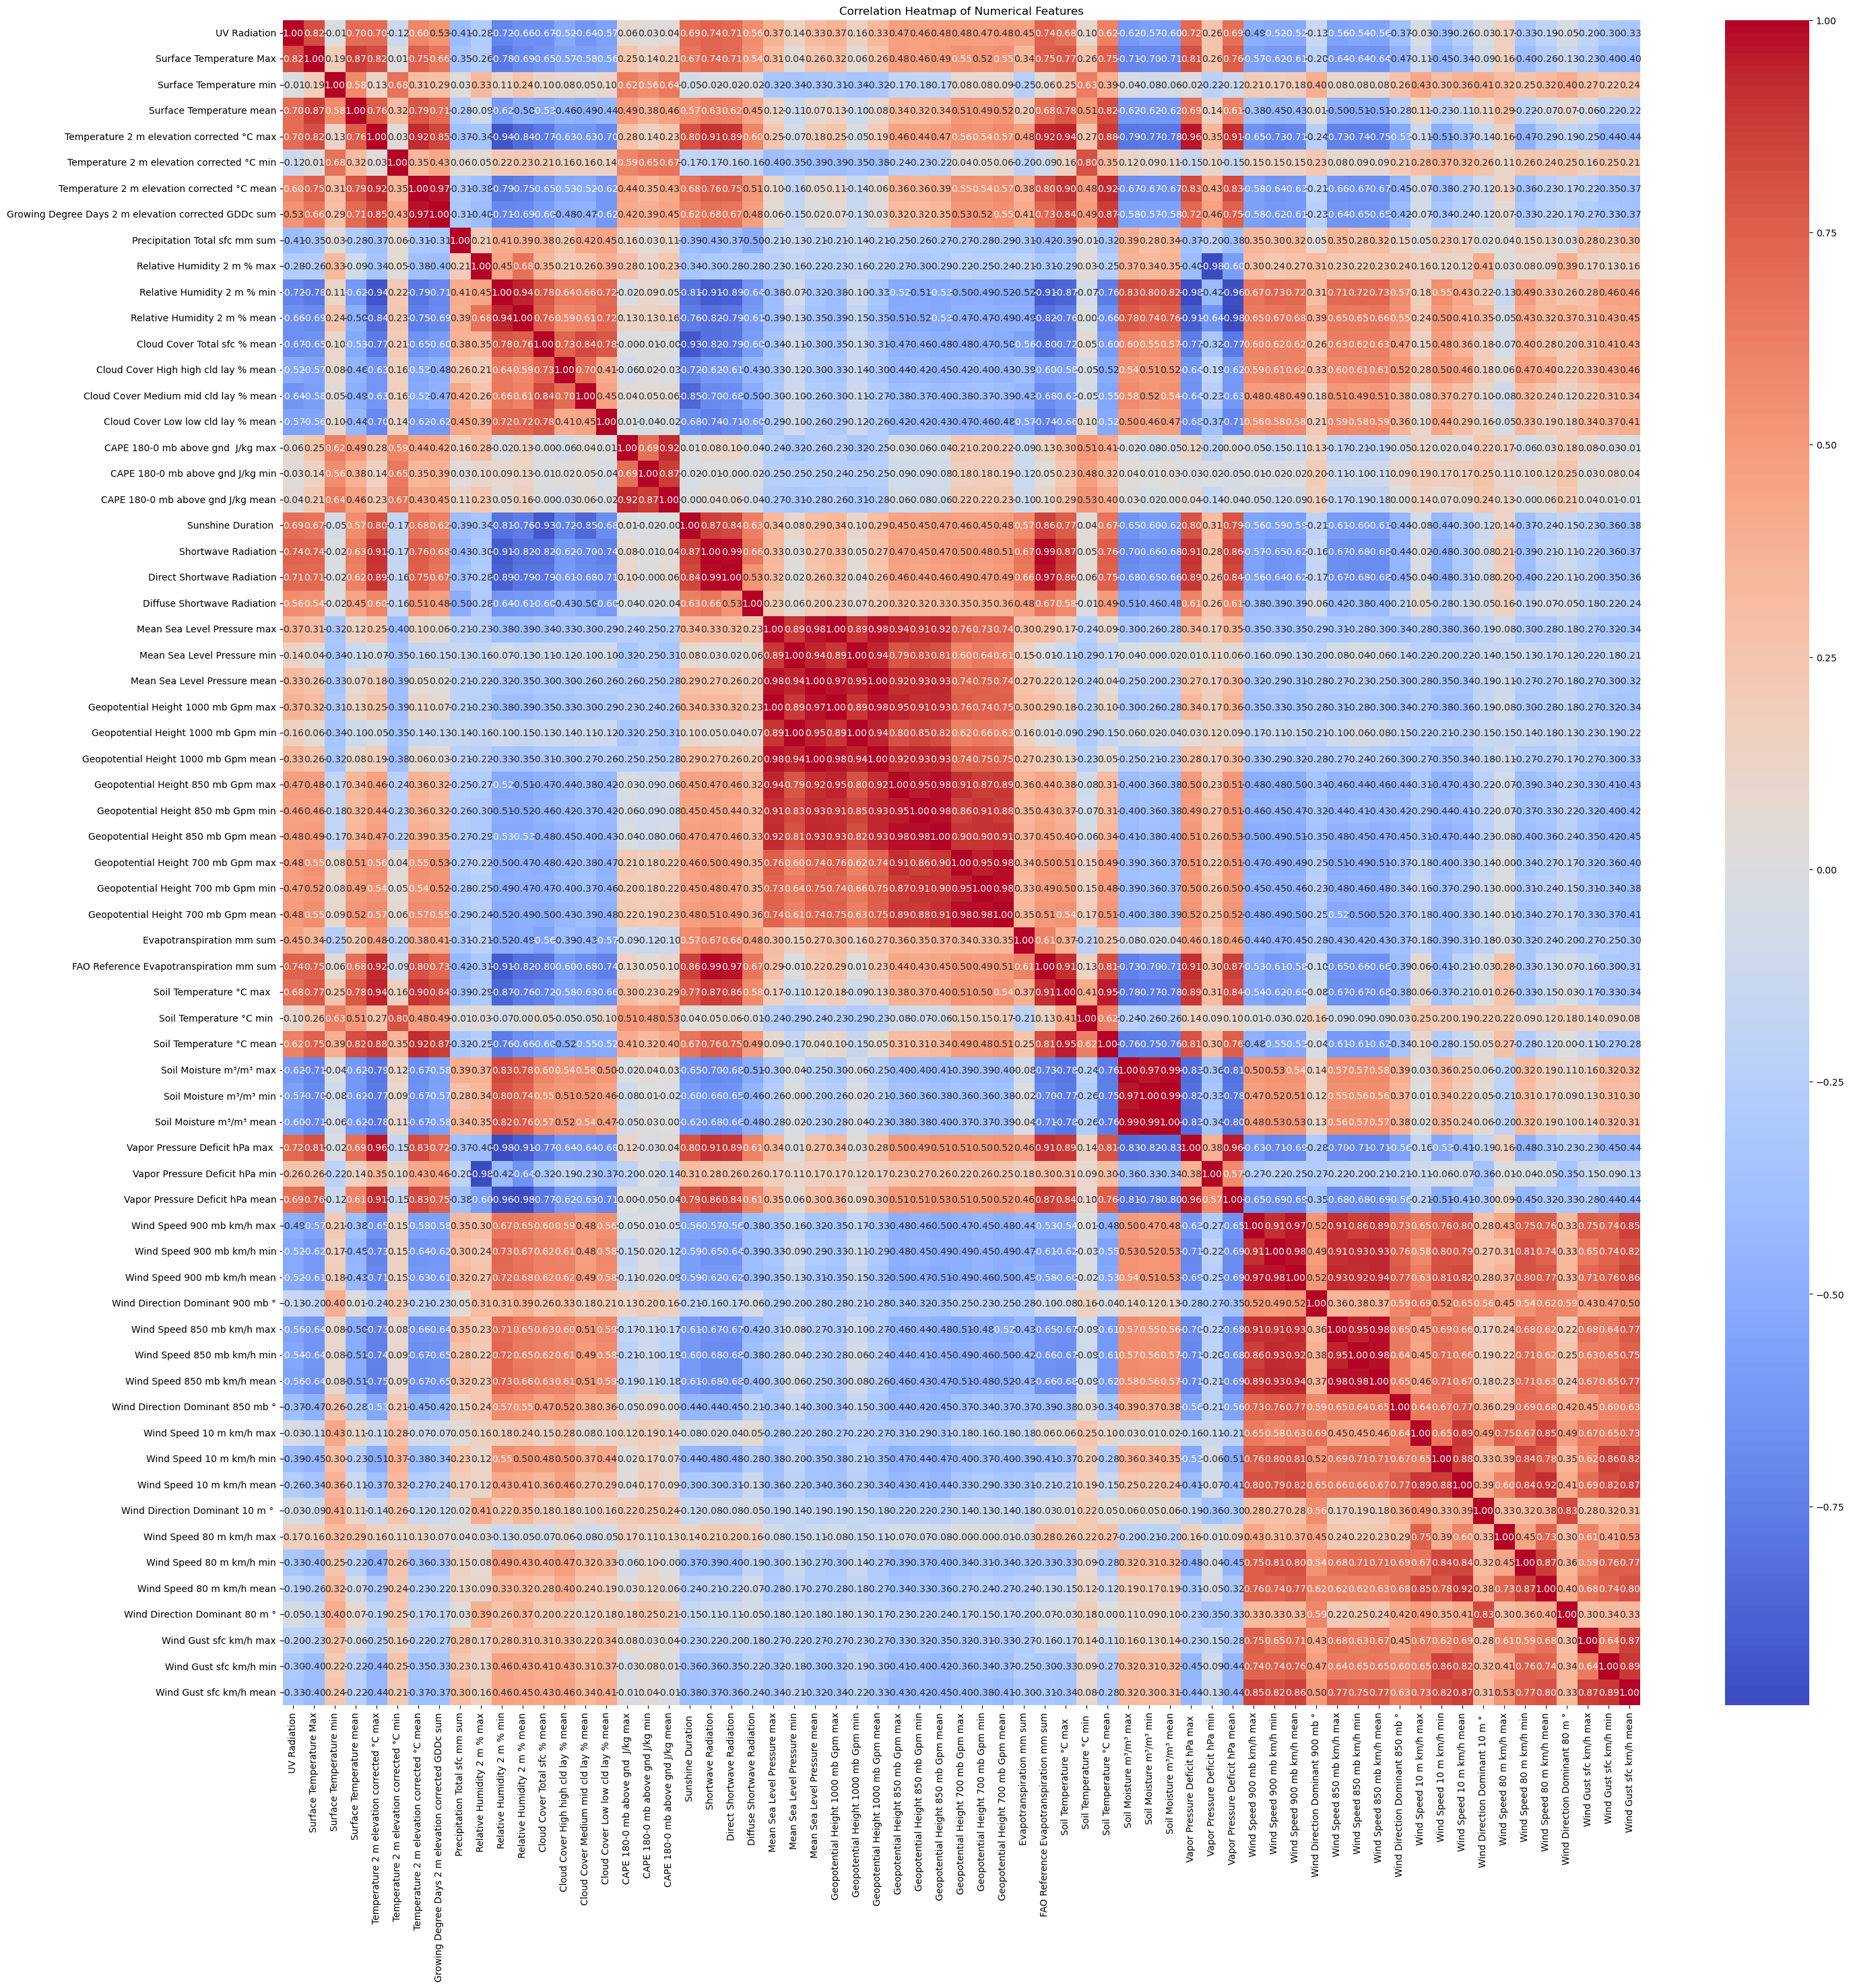

In [5]:
# Determine the number of numerical features
num_features = len(numerical_columns.columns)

# Set figsize based on the number of features
figsize = (max(8, num_features/2), max(6, num_features/2))

# Create a heatmap
plt.figure(figsize=figsize)  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [6]:
# Extract correlation values between 'Precipitation Total sfc mm sum' and other features
precipitation_correlation = correlation_matrix['Precipitation Total sfc mm sum'].drop('Precipitation Total sfc mm sum')

# Sort correlation values in descending order
precipitation_correlation_sorted = precipitation_correlation.abs().sort_values(ascending=False)

# Print the sorted correlation values
print(precipitation_correlation_sorted)

Diffuse Shortwave Radiation                0.496070
Cloud Cover Low low cld lay % mean         0.446863
Shortwave Radiation                        0.428546
Cloud Cover Medium mid cld lay % mean      0.423720
FAO Reference Evapotranspiration mm sum    0.422252
                                             ...   
CAPE 180-0 mb above gnd J/kg min           0.032638
Wind Direction Dominant 80 m °             0.030651
Surface Temperature min                    0.028241
Wind Direction Dominant 10 m °             0.020529
Soil Temperature °C min                    0.014844
Name: Precipitation Total sfc mm sum, Length: 64, dtype: float64


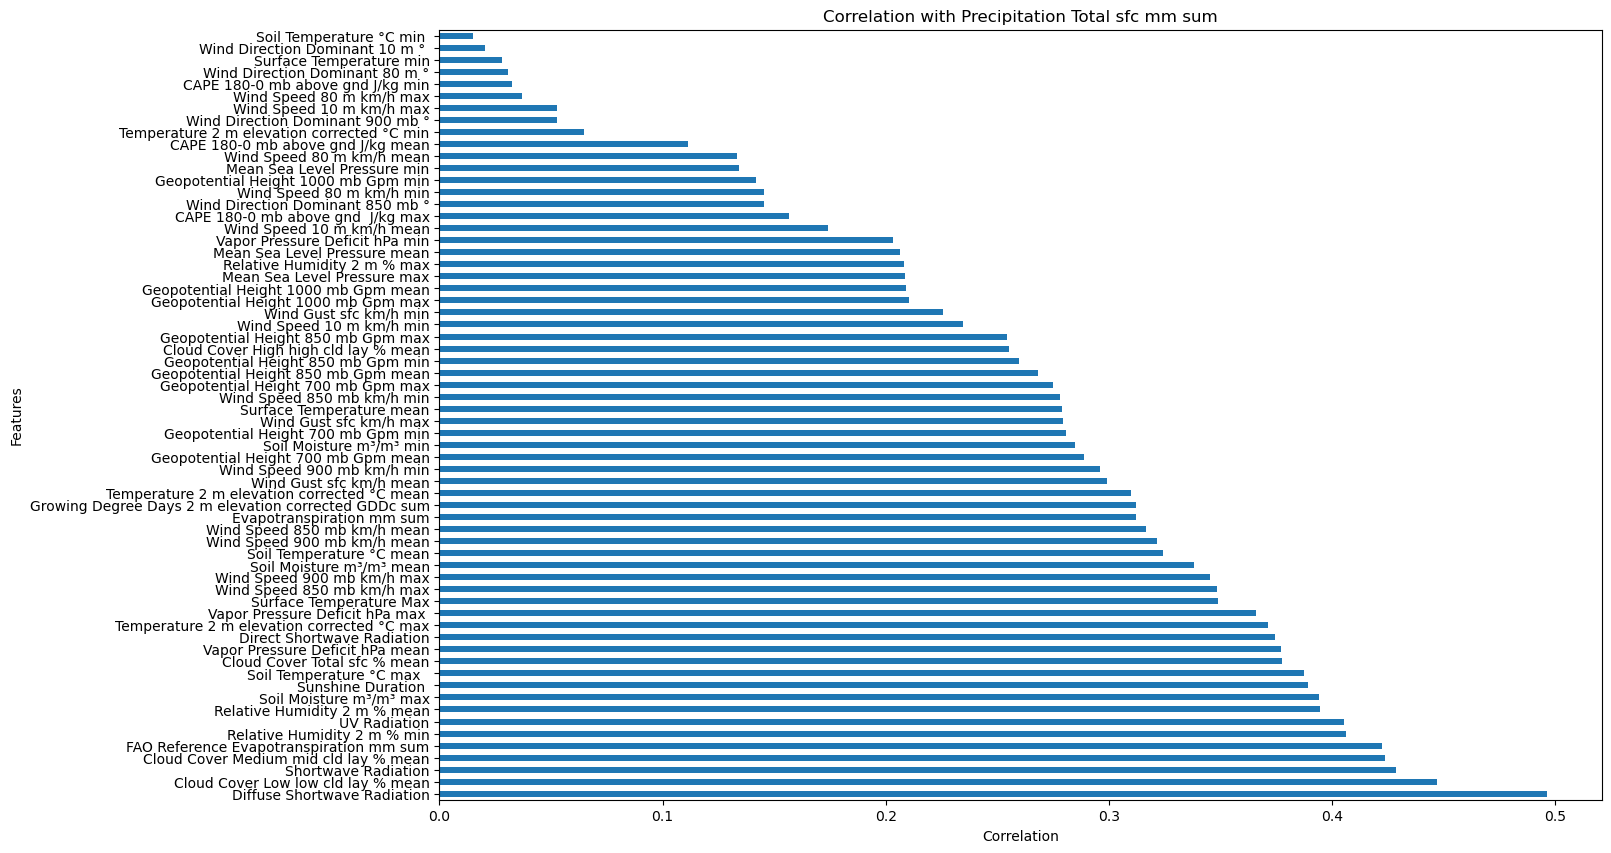

In [7]:
plt.figure(figsize=(15, 10))
precipitation_correlation_sorted.plot(kind='barh')  # Horizontal bar chart
plt.title('Correlation with Precipitation Total sfc mm sum')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [8]:
# Define the threshold
threshold = 0.28

# Filter features with correlation values above the threshold
selected_features = precipitation_correlation_sorted[precipitation_correlation_sorted > threshold]

# Print the selected features
print("Selected features with correlation above 0.3:")
print(selected_features)

Selected features with correlation above 0.3:
Diffuse Shortwave Radiation                             0.496070
Cloud Cover Low low cld lay % mean                      0.446863
Shortwave Radiation                                     0.428546
Cloud Cover Medium mid cld lay % mean                   0.423720
FAO Reference Evapotranspiration mm sum                 0.422252
Relative Humidity 2 m % min                             0.406282
UV Radiation                                            0.405380
Relative Humidity 2 m % mean                            0.394432
Soil Moisture m³/m³ max                                 0.394242
Sunshine Duration                                       0.389345
Soil Temperature °C max                                 0.387363
Cloud Cover Total sfc % mean                            0.377364
Vapor Pressure Deficit hPa mean                         0.377167
Direct Shortwave Radiation                              0.374479
Temperature 2 m elevation corrected °C max  

In [9]:
from sklearn.model_selection import train_test_split
# 1. Prepare the Data
X = df_filtered[selected_features.index]  # Features
y = df_filtered['Precipitation Total sfc mm sum']  # Target variable
# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Define the models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Iterate over models
for name, model in models.items():
    
    # Train the Model
    model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)  # Calculate R^2
    print(f"Mean Squared Error for {name}: {mse}")
    print(f"Root Mean Squared Error for {name}: {rmse}")
    print(f"R^2 for {name}: {r2}")
rf_pred=y_pred

Mean Squared Error for Random Forest: 7.335391973003226
Root Mean Squared Error for Random Forest: 2.7083928764127307
R^2 for Random Forest: 0.7757468609170053
Mean Squared Error for Gradient Boosting: 7.384909025254612
Root Mean Squared Error for Gradient Boosting: 2.7175189098246606
R^2 for Gradient Boosting: 0.7742330557316276
Mean Squared Error for XGBoost: 6.70314134396838
Root Mean Squared Error for XGBoost: 2.58904255352599
R^2 for XGBoost: 0.7950756423604615


In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Define the GPR model
gpr = GaussianProcessRegressor(kernel=RBF(), random_state=42)

# Fit the GPR model
gpr.fit(X_train, y_train)

# Predict with GPR
y_pred_gpr, sigma = gpr.predict(X_test, return_std=True)

# Evaluate GPR (if needed)
mse_gpr = mean_squared_error(y_test, y_pred_gpr)
rmse_gpr = np.sqrt(mse_gpr)
r2_gpr = r2_score(y_test, y_pred_gpr)
print("GPR Performance:")
print("Mean Squared Error:", mse_gpr)
print("Root Mean Squared Error:", rmse_gpr)
print("R^2 Score:", r2_gpr)

GPR Performance:
Mean Squared Error: 36.367591407168504
Root Mean Squared Error: 6.030554817524545
R^2 Score: -0.11180787120313518


In [12]:
from statsmodels.regression.quantile_regression import QuantReg

# Define the quantile regression model
quantile = 0.5  # Example: 0.5 for median, 0.25 for 25th percentile, 0.75 for 75th percentile
quantile_reg = QuantReg(y_train, X_train).fit(q=quantile)

# Predict with quantile regression
y_pred_quantile = quantile_reg.predict(X_test)

# Evaluate quantile regression (if needed)
mse_quantile = mean_squared_error(y_test, y_pred_quantile)
rmse_quantile = np.sqrt(mse_quantile)
r2_quantile = r2_score(y_test, y_pred_quantile)
print("Quantile Regression Performance:")
print("Mean Squared Error:", mse_quantile)
print("Root Mean Squared Error:", rmse_quantile)
print("R^2 Score:", r2_quantile)

Quantile Regression Performance:
Mean Squared Error: 22.986380846444128
Root Mean Squared Error: 4.794411418145519
R^2 Score: 0.29727435426168825


In [13]:
from statsmodels.regression.quantile_regression import QuantReg

# Define the quantile regression model
quantile = 0.5  # Example: 0.5 for median, 0.25 for 25th percentile, 0.75 for 75th percentile
quantile_reg = QuantReg(y_train, X_train).fit(q=quantile)

# Predict with quantile regression
y_pred_quantile = quantile_reg.predict(X_test)

# Evaluate quantile regression (if needed)
mse_quantile = mean_squared_error(y_test, y_pred_quantile)
rmse_quantile = np.sqrt(mse_quantile)
r2_quantile = r2_score(y_test, y_pred_quantile)
print("Quantile Regression Performance:")
print("Mean Squared Error:", mse_quantile)
print("Root Mean Squared Error:", rmse_quantile)
print("R^2 Score:", r2_quantile)

Quantile Regression Performance:
Mean Squared Error: 22.986380846444128
Root Mean Squared Error: 4.794411418145519
R^2 Score: 0.29727435426168825


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

# Initialize base estimator (Decision Tree Regressor)
base_estimator = DecisionTreeRegressor(max_depth=4)

# AdaBoost Regressor
adaboost = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)

# Evaluate AdaBoost
mse_ab = mean_squared_error(y_test, y_pred_ab)
rmse_ab = np.sqrt(mse_ab)  # Calculate RMSE
r2_ab = r2_score(y_test, y_pred_ab)  # Calculate R^2
print("AdaBoost:")
print("Mean Squared Error:", mse_ab)
print("Root Mean Squared Error:", rmse_ab)
print("R^2 Score:", r2_ab)

# LightGBM Regressor
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate LightGBM
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print("\nLightGBM:")
print("Mean Squared Error:", mse_lgbm)
print("Root Mean Squared Error:", rmse_lgbm)
print("R^2 Score:", r2_lgbm)

# SVR (Support Vector Regressor)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("\nSVR:")
print("Mean Squared Error:", mse_svr)
print("Root Mean Squared Error:", rmse_svr)
print("R^2 Score:", r2_svr)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost:
Mean Squared Error: 15.866919101386008
Root Mean Squared Error: 3.983330152195021
R^2 Score: 0.5149262058309672
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7564
[LightGBM] [Info] Number of data points in the train set: 9934, number of used features: 31
[LightGBM] [Info] Start training from score 1.925931

LightGBM:
Mean Squared Error: 6.295242587225696
Root Mean Squared Error: 2.5090322013130275
R^2 Score: 0.807545674904632

SVR:
Mean Squared Error: 26.980938505907336
Root Mean Squared Error: 5.194317905741555
R^2 Score: 0.17515516858224955


In [15]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

# Ridge Regressor
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge:")
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R^2 Score:", r2_ridge)

# Lasso Regressor
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nLasso:")
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("R^2 Score:", r2_lasso)

# Elastic Net Regressor
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)

# Evaluate Elastic Net
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
rmse_elastic_net = np.sqrt(mse_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
print("\nElastic Net:")
print("Mean Squared Error:", mse_elastic_net)
print("Root Mean Squared Error:", rmse_elastic_net)
print("R^2 Score:", r2_elastic_net)

# Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Evaluate Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nDecision Tree:")
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R^2 Score:", r2_dt)


Ridge:
Mean Squared Error: 14.402766676940988
Root Mean Squared Error: 3.795097716388998
R^2 Score: 0.5596873826687122


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.629e+04, tolerance: 3.710e+01
  model = cd_fast.enet_coordinate_descent(



Lasso:
Mean Squared Error: 17.57595261874775
Root Mean Squared Error: 4.192368378225815
R^2 Score: 0.4626786732550753


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.858e+04, tolerance: 3.710e+01
  model = cd_fast.enet_coordinate_descent(



Elastic Net:
Mean Squared Error: 17.161803135094413
Root Mean Squared Error: 4.142680670181376
R^2 Score: 0.47533979921816927

Decision Tree:
Mean Squared Error: 15.435410318756396
Root Mean Squared Error: 3.9287924759086468
R^2 Score: 0.5281180297175037


In [16]:
from sklearn.ensemble import BaggingRegressor

# Bagging with Decision Tree Regressor
bagging_dt = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                               n_estimators=10,  # Number of base estimators (Decision Trees)
                               random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bagging_dt = bagging_dt.predict(X_test)

# Evaluate Bagging with Decision Tree
mse_bagging_dt = mean_squared_error(y_test, y_pred_bagging_dt)
rmse_bagging_dt = np.sqrt(mse_bagging_dt)
r2_bagging_dt = r2_score(y_test, y_pred_bagging_dt)
print("\nBagging with Decision Tree:")
print("Mean Squared Error:", mse_bagging_dt)
print("Root Mean Squared Error:", rmse_bagging_dt)
print("R^2 Score:", r2_bagging_dt)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging with Decision Tree:
Mean Squared Error: 7.802912489266148
Root Mean Squared Error: 2.793369379309895
R^2 Score: 0.7614541082265531


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define Polynomial Regression model pipeline
poly_regression = make_pipeline(PolynomialFeatures(degree=2), Ridge())

# Fit Polynomial Regression model
poly_regression.fit(X_train, y_train)

# Predict with Polynomial Regression
y_pred_poly = poly_regression.predict(X_test)

# Evaluate Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("\nPolynomial Regression:")
print("Mean Squared Error:", mse_poly)
print("Root Mean Squared Error:", rmse_poly)
print("R^2 Score:", r2_poly)


Polynomial Regression:
Mean Squared Error: 7.475836366873881
Root Mean Squared Error: 2.7341975727576604
R^2 Score: 0.7714532803819751


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.05192e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train, X_test, y_train, y_test are already defined and contain your meteorological data and precipitation values

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (1 neuron for precipitation prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Neural Network Regression:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

nn_pred=y_pred

Epoch 1/100
311/311 [==============================] - 1s 2ms/step - loss: 24.0859
Epoch 2/100
311/311 [==============================] - 1s 2ms/step - loss: 17.2634
Epoch 3/100
311/311 [==============================] - 1s 2ms/step - loss: 13.9027
Epoch 4/100
311/311 [==============================] - 1s 2ms/step - loss: 11.8787
Epoch 5/100
311/311 [==============================] - 1s 2ms/step - loss: 10.9535
Epoch 6/100
311/311 [==============================] - 1s 2ms/step - loss: 10.1536
Epoch 7/100
311/311 [==============================] - 1s 2ms/step - loss: 9.6115
Epoch 8/100
311/311 [==============================] - 1s 2ms/step - loss: 8.9704
Epoch 9/100
311/311 [==============================] - 1s 2ms/step - loss: 8.3280
Epoch 10/100
311/311 [==============================] - 1s 2ms/step - loss: 8.4374
Epoch 11/100
311/311 [==============================] - 1s 2ms/step - loss: 7.9861
Epoch 12/100
311/311 [==============================] - 1s 2ms/step - loss: 7.1680
Epoch 1

In [35]:
Hybrid_model1= 0.77*(nn_pred)+0.23*(y_pred_lgbm)

In [36]:
mse = mean_squared_error(y_test,Hybrid_model1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,Hybrid_model1)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 4.939022415397262
Root Mean Squared Error: 2.2223911481549017
R^2 Score: 0.8490072126028945


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor

# Define the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Train the XGBoost Model
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost Model
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)  # Calculate RMSE
r2_xgb = r2_score(y_test, y_pred_xgb)  # Calculate R^2

print("XGBoost Model Evaluation:")
print(f"Mean Squared Error for XGBoost: {mse_xgb}")
print(f"Root Mean Squared Error for XGBoost: {rmse_xgb}")
print(f"R^2 for XGBoost: {r2_xgb}")

# Get final predictions for XGBoost model
final_predictions_xgb = y_pred_xgb


XGBoost Model Evaluation:
Mean Squared Error for XGBoost: 6.70314134396838
Root Mean Squared Error for XGBoost: 2.58904255352599
R^2 for XGBoost: 0.7950756423604615


In [22]:
Hybrid_model2= 0.75*(nn_pred)+0.25*(final_predictions_xgb)

In [23]:
mse = mean_squared_error(y_test,Hybrid_model2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,Hybrid_model2)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 4.693790992202978
Root Mean Squared Error: 2.1665158647475855
R^2 Score: 0.8565042784250761


In [26]:
final_model=0.3*(Hybrid_model1)+0.7*(Hybrid_model2)

In [27]:
mse = mean_squared_error(y_test,final_model)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,final_model)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 4.67875708314521
Root Mean Squared Error: 2.1630434769428954
R^2 Score: 0.8569638859431612


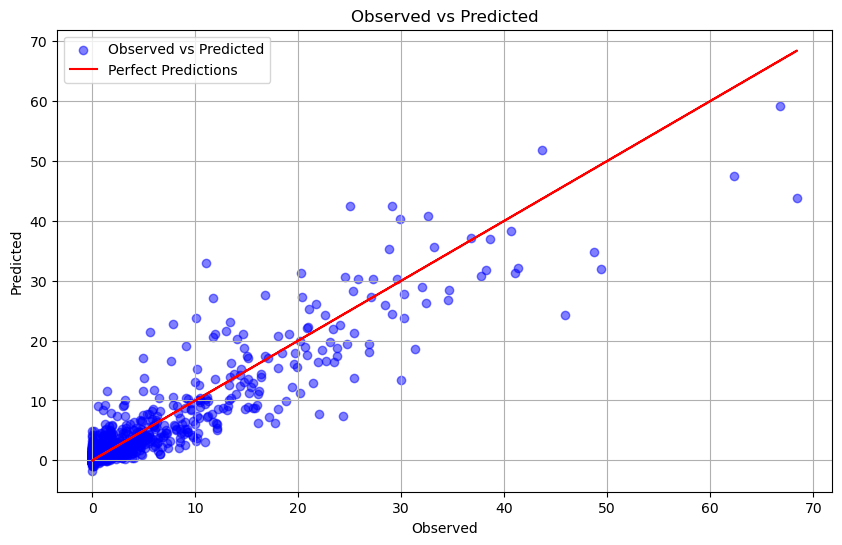

Mean Squared Error: 4.67875708314521
Root Mean Squared Error: 2.1630434769428954
R^2 Score: 0.8569638859431612


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'final_model' contains the predicted values

# Calculate mean squared error
mse = mean_squared_error(y_test, final_model)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Calculate R^2 score
r2 = r2_score(y_test, final_model)

# Create a scatter plot of observed vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_model, alpha=0.5, color='blue', label='Observed vs Predicted')

# Plot the diagonal line representing perfect predictions
plt.plot(y_test, y_test, color='red', label='Perfect Predictions')

plt.title('Observed vs Predicted')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")